<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---


## **Projeto de parceria -** Colisões de veículos motorizados na cidade de Nova York

Aluno: [Rafael Doya Salles Rodrigues](https://www.linkedin.com/in/rafaeldoyarodrigues/)


---



## **Tópicos**


*   Coleta de dados
*   Modelagem
*   Conclusão.

---




### **Coleta de dados necessarias para o resultado final.**

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'vehicle-collisions:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F679%2F1722%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240205%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240205T202723Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d796e193022692832303326b8cec4a011acc0c71f418b2ffdb5f343a3abc8d0b1eccda35d924a5161c4ab2456bdcac50e1b62f6c2e0d22cf0400f89cc54053b17e3a33bbe8d37db2fa169b9968111039e0ba5c717455fe7171294a7435b2ae66abdceec4769034aaf9dd032ad6ab934cbc976eeae0e62dad8da4e0cb4c6dbe827fd670955685dd15b5c7df40829e7853f56ef95d312c7924e8a3573ec3411f3b655cae6aadfd66fd4d1a3a8ea7c3c1160aaa827187c7e16d1b2f707a76e90480eb99c8d751c9b3632f27ae68636657b94bcfaab33acd5711b514dd313d0ba82b1f01b8c3fb54a68bdeb926b89a10a9f000e162f6f62cab4487cbead69dc2519,nyc-borough-boundaries:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F472242%2F885774%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240205%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240205T202723Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D072c7cdee58825e1774033016534b420181fe19068845ec039fdc6327826779d74a4c16a58a2d18f0708ed8cc8e7cc432b2b1d7a562e94a33fb551b83bcee6b81582202b493b049feed0c7379180159138ecebd62a4ffc4ac77623605ec90fa3c6b6533f4f3ab2e7cbc1a76eefdbae3d28eb00802c64d08b0324e1fef56aeba1a21493b0135a0ebc7e8bcef71a45854424e96b556929dd0b3c3f9828f273bd3936b76559c0cab2092b0b0ed75123ce0e6a3eeb0066816ef281e591fb3a918b56ee9e478b614b6d5260db102ff99dbb9e90bdad2d70bed9841619ca54262b22d90d6f9fed7f727ec4c577f1a1a36aa8dd60482d8c584133a4a62be137d0d812a2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 16118406 bytes downloaded
Downloaded and uncompressed: vehicle-collisions
[==================================================] 850640 bytes downloaded
Downloaded and uncompressed: nyc-borough-boundaries
Data source import complete.


## **Contexto**


A análise e visualização das colisões de veículos motorizados em Nova York, utilizando dados fornecidos pelo NYC Open Data, são fundamentais para compreender os padrões e os fatores de risco associados aos acidentes.

Por meio de técnicas de Ciência de Dados, como análise estatística e visualização de dados, é possível identificar áreas de alto risco, padrões temporais e correlações entre variáveis. Essas informações fornecem uma base sólida para a implementação de medidas proativas que visam melhorar a segurança viária e reduzir o número de acidentes, em colaboração com autoridades municipais e comunidades locais. A visualização eficaz dos dados não apenas simplifica a compreensão dos padrões complexos, mas também facilita a comunicação de insights e direciona políticas públicas voltadas para a segurança no trânsito.

A base de dados utilizada no projeto foi retirada do [Kaggle.](https://www.kaggle.com/code/skhiearth/nyc-motor-vehicle-collisions/notebook)

In [ ]:
!wget -q "https://www.kaggle.com/code/skhiearth/nyc-motor-vehicle-collisions/notebook"

O projeto por fim tem como principio, mostrar os acidentes mais propensos a acontecer no transito.

## **Manipulação dos dados.**

In [ ]:
!pip install pywaffle
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pywaffle import Waffle
import geopandas as gpd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 36.8 MB/s eta 0:00:00


Dando inicio ao tratamento de dados e convertendo para csv.

---



In [ ]:
raw_data = pd.read_csv('/kaggle/input/vehicle-collisions/database.csv')

print(raw_data.shape)
raw_data.head(3)

(477732, 29)


,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Lendo o arquivo CSV e criando o DataFrame
raw_data = pd.read_csv('/kaggle/input/vehicle-collisions/database.csv')

# Verificando a forma (número de linhas e colunas) do DataFrame
print(raw_data.shape)

# Exibindo as primeiras 3 linhas do DataFrame
raw_data.head(3)


(477732, 29)


,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN


Agora vamos manter as colunas que nos interessam.

In [ ]:
# Mantendo apenas as colunas desejadas
raw_data = raw_data[['VEHICLE 1 FACTOR', 'VEHICLE 2 FACTOR', 'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR']]

# Exibindo as primeiras linhas do DataFrame após a seleção das colunas
raw_data.head()


,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


excluindo valores que resultam em NaN.


In [ ]:
# Mantendo apenas as colunas desejadas
raw_data = raw_data[['VEHICLE 1 FACTOR', 'VEHICLE 2 FACTOR', 'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR']]

# Removendo linhas que contenham valores NaN
raw_data = raw_data.dropna()

# Exibindo as primeiras linhas do DataFrame após a seleção das colunas e a remoção dos valores NaN
raw_data.head()


,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
47,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED
89,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED
287,ALCOHOL INVOLVEMENT,OTHER VEHICULAR,OTHER VEHICULAR,OTHER VEHICULAR,OTHER VEHICULAR
321,ALCOHOL INVOLVEMENT,ALCOHOL INVOLVEMENT,ALCOHOL INVOLVEMENT,UNSPECIFIED,UNSPECIFIED
831,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED


Vamos agora classificar as causas dos acidentes ocorridos em NYC.

In [ ]:
import pandas as pd

causas_acidentes = raw_data[['VEHICLE 1 FACTOR', 'VEHICLE 2 FACTOR', 'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR']].stack().value_counts()

# Exiba as 10 maiores causas de acidentes
print(causas_acidentes.head(10))


UNSPECIFIED                       6547
DRIVER INATTENTION/DISTRACTION     394
FATIGUED/DROWSY                    290
ALCOHOL INVOLVEMENT                229
OTHER VEHICULAR                    219
FOLLOWING TOO CLOSELY              160
TRAFFIC CONTROL DISREGARDED        159
PAVEMENT SLIPPERY                  116
DRIVER INEXPERIENCE                 70
FAILURE TO YIELD RIGHT-OF-WAY       69
dtype: int64


Para termos uma melhor visualização dos dados tratados, vamos transformalos em graficos.

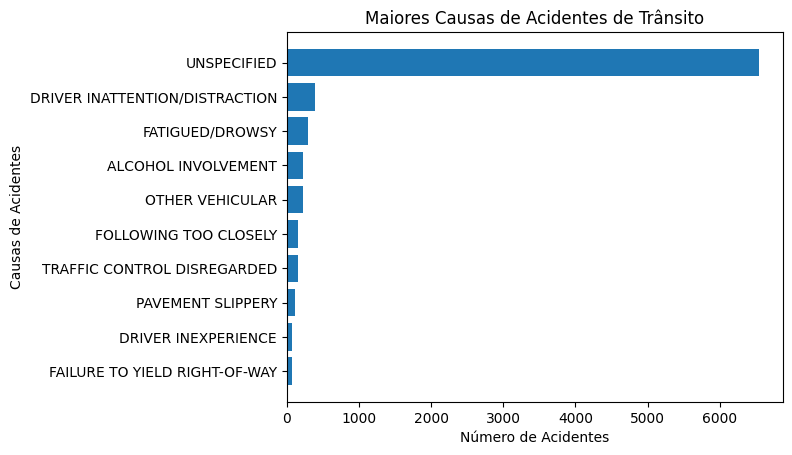

In [ ]:
import matplotlib.pyplot as plt

causas_acidentes = {
    'UNSPECIFIED': 6547,
    'DRIVER INATTENTION/DISTRACTION': 394,
    'FATIGUED/DROWSY': 290,
    'ALCOHOL INVOLVEMENT': 229,
    'OTHER VEHICULAR': 219,
    'FOLLOWING TOO CLOSELY': 160,
    'TRAFFIC CONTROL DISREGARDED': 159,
    'PAVEMENT SLIPPERY': 116,
    'DRIVER INEXPERIENCE': 70,
    'FAILURE TO YIELD RIGHT-OF-WAY': 69
}

fig, ax = plt.subplots()

ax.barh(list(causas_acidentes.keys()), list(causas_acidentes.values()))

ax.set_xlabel('Número de Acidentes')
ax.set_ylabel('Causas de Acidentes')
ax.set_title('Maiores Causas de Acidentes de Trânsito')

ax.invert_yaxis()

plt.show()



Com base nos 10 casos mais frequentes de causas de acidentes listados, é possível fazer algumas observações e análises de dados:

**UNSPECIFIED (Não Especificado)**: Esta categoria é bastante genérica e pode incluir uma variedade de circunstâncias não detalhadas nos registros de acidentes. A alta frequência pode indicar uma lacuna na documentação ou na identificação precisa das causas dos acidentes.

**DRIVER INATTENTION/DISTRACTION (Desatenção/Distração do Motorista)**: A distração do motorista é uma causa comum de acidentes e pode incluir o uso de dispositivos eletrônicos, conversas no veículo, entre outros fatores.

**FATIGUED/DROWSY (Cansaço/Sonolência)**: A fadiga e a sonolência dos motoristas podem resultar em tempos de reação mais lentos e menor capacidade de tomar decisões, aumentando o risco de acidentes.

**ALCOHOL INVOLVEMENT (Envolvimento com Álcool)**: O álcool é uma das principais causas de acidentes de trânsito em muitos lugares do mundo. Conduzir sob a influência do álcool pode levar a habilidades motoras comprometidas e tomada de decisão prejudicada.

**OTHER VEHICULAR (Outro Veicular)**: Esta categoria pode incluir uma variedade de fatores relacionados aos veículos envolvidos nos acidentes, como falhas mecânicas, problemas de manutenção ou condições inadequadas dos veículos.

**FOLLOWING TOO CLOSELY (Seguir Muito de Perto)**: A falta de distância adequada entre veículos pode resultar em colisões traseiras, especialmente em situações de tráfego lento ou parado.

**TRAFFIC CONTROL DISREGARDED (Desrespeito ao Controle de Tráfego)**: Ignorar sinais de trânsito, semáforos ou outras regras de trânsito pode resultar em colisões e infrações.

**PAVEMENT SLIPPERY (Pavimento Escorregadio)**: Condições climáticas adversas, como chuva, neve ou gelo, podem tornar o pavimento escorregadio, aumentando o risco de acidentes.

**DRIVER INEXPERIENCE (Inexperiência do Motorista)**: Motoristas inexperientes podem ter dificuldades em antecipar situações de trânsito e responder adequadamente a elas, aumentando o risco de acidentes.

**FAILURE TO YIELD RIGHT-OF-WAY (Falha em Dar a Preferência)**: Não ceder a preferência pode resultar em colisões em cruzamentos e interseções, especialmente em situações de tráfego intenso.

Essas conclusões destacam a importância de várias medidas para melhorar a segurança no trânsito, incluindo educação e conscientização dos motoristas, aplicação eficaz das leis de trânsito, manutenção adequada de veículos e melhorias na infraestrutura viária para mitigar condições perigosas. Além disso, a análise contínua dos dados de acidentes pode ajudar na identificação de áreas de risco e no desenvolvimento de estratégias de prevenção de acidentes mais eficazes.